# i. INTRODUCTION

    - Nama : Arisha Yenadi Putra
    - Kelas : Data Science Fullstack Batch 07

MILESTONES 1 Phase 2

Gambaran data set yang digunakan adalah Data Frame yang terdiri dari 7043 rows dan 21 columns. dan tipe data yang terdapat dalam data frame ini :
- Float
- Integer
- Object

Description : Menganalisa datset pada perusahan telco untuk menentukan pelanggan termasuk ke churn atau tidak

Objektif :
- Memahami konsep Artificial Neural Network.
- Mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Menganalisis dan menjelaskan layer yang dibuat.

# ii. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf

In [2]:
# Untuk ngilangin warning pada plot

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Classification Report
from sklearn.metrics import classification_report
# Menditeksi Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split Dataset
from sklearn.model_selection import train_test_split

# Data Scaling MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Laber OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Functional API Neural Network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Random Forest (Untuk Feature Importance)
from sklearn.ensemble import RandomForestClassifier

# iii. DATA LOADING

In [4]:
# Menginput Dataset Customer Telco Churn
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
# Mengecek bentuk dataset
df.shape

(7043, 21)

In [6]:
# Mengecek kata kunci yang ada pada dataset
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Melihat mean, std, mode, Q1, Q2, Q3, Min, dan Max di setiap kolom pada dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


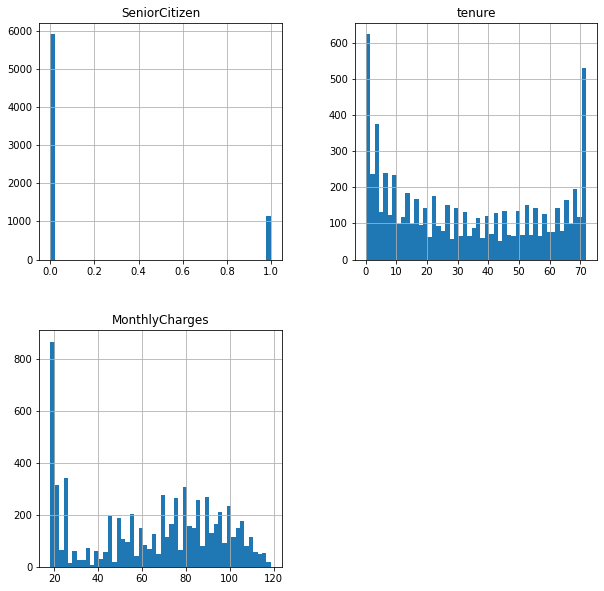

In [8]:
# Melihat gambaran distribusi data numeric menggunakan grafik histogram
%matplotlib inline
df.hist(bins=50, figsize=(10,10))
plt.show()

- Bisa dilihat untuk persebaran data pada kolom numeric yang dimana pada feature SeniorCitizen asumsi saya termasuk categorical yang menggunakan angka, dan pada kolom tenure dan MonthlyCharges bentuk distibusinya mengarah normal ke skewed. Nanti akan saya jelaskan lagi lebih lanjut pada data cleaning.

In [9]:
# Melihat informasi pada dataset, terdapat tipe data, banyaknya kolom, dan juga missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Untuk melihat lebih jelas missing value pada setiap kolom
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# iv. DATA EXPLORATION (EDA)

In [11]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
eda = df.copy()

In [14]:
# Mengubah kolom total charges menjadi float untuk kepentingan eda
eda['TotalCharges'] = eda.TotalCharges.apply(pd.to_numeric, errors='coerce')

In [15]:
# Membuat fungsi untuk melihat unique value pada kolom category
def print_cat_unique(eda):
    for column in eda:
        if eda[column].dtypes == 'object':
            print(f'{column} : {eda[column].unique()}')

In [16]:
print_cat_unique(eda)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
# Membandingkan antar gender dengan metode pembayarannya
pd.crosstab(eda["PaymentMethod"], eda["gender"])

gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),788,756
Credit card (automatic),752,770
Electronic check,1170,1195
Mailed check,778,834


<AxesSubplot:xlabel='gender'>

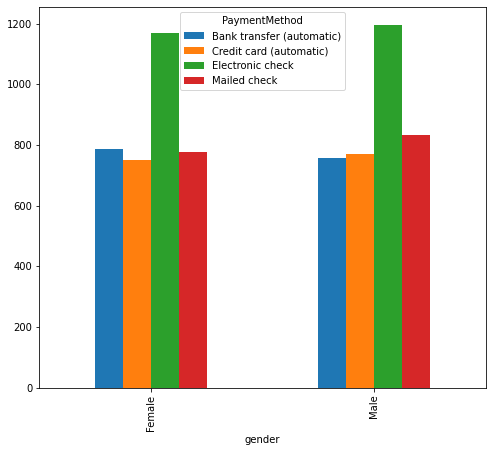

In [18]:
pd.crosstab(df["gender"],df["PaymentMethod"]).plot(kind='bar', figsize=(8,7))

- Bisa dilihat dari bar chart diatas, metode pembayaran antara gender customer yang pria dengan perempuan terbilang mirip

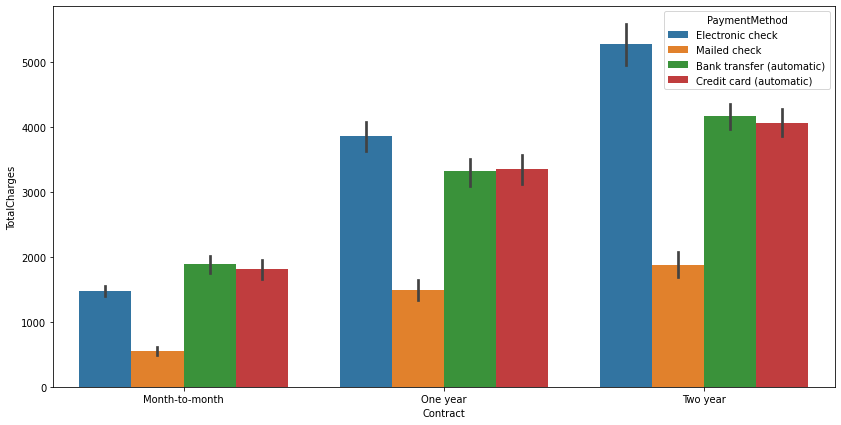

In [19]:
# Membandingkan Total charge dari setiap kontraknya dengan metode pembayaran
f, ax = plt.subplots(figsize=(14, 7))
ax = sns.barplot(x="Contract", y="TotalCharges", hue="PaymentMethod", data=eda)

- Dari chart diatas bisa dilihat bahwa pada kontrak bulanan, total charge tertinggi dibayarkan melalui pos
- Dan untuk kontrak tahunan, metode pembayaran yang paling banyak berkontribusi ada pada electronic check
- Dan untuk kontrak per 2 tahun, metode pembayaran yang paling banyak berkontribusi adalah electronic check juga

In [20]:
# Membandingkan total pelanggan yang churn dengan metode pembayaran yang digital atau tidak menggunakan check kertas
pd.crosstab(eda["Churn"], eda["PaperlessBilling"])

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


<AxesSubplot:xlabel='Churn'>

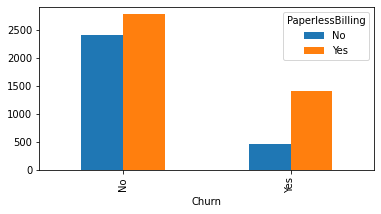

In [21]:
pd.crosstab(eda["Churn"], eda["PaperlessBilling"]).plot(kind='bar', figsize=(6,3))

- Pada pelanggan jasa kita, paling banyak menggunakan pembayaran digital
- Sedangkan customer yang churn juga paling banyak menggunakan pembayran digital

In [22]:
# Membandingkan pelanggan yang churn dengan kontrak yang mereka pilih
pd.crosstab(eda["Churn"], eda["Contract"])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


<AxesSubplot:xlabel='Churn'>

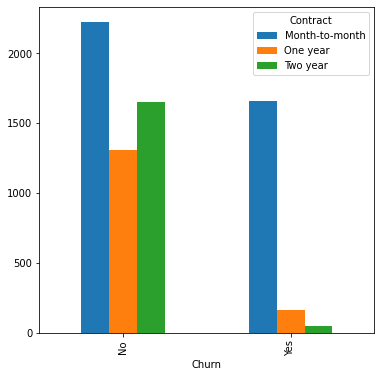

In [23]:
pd.crosstab(eda["Churn"], eda["Contract"]).plot(kind='bar', figsize=(6,6))

- Dilihat dari chart diatas, kotrak yang paling banyak dipilih oleh pelanggan kita adalah kontrak bulanan
- Dan juga pada customer kita yang churn, paling banyak ada pada customer kita yang memilih kontrak jasa kita bulanan

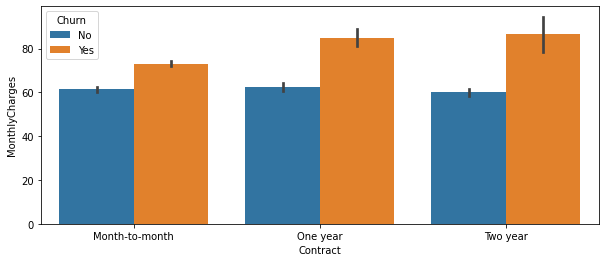

In [24]:
# Membandingkan kontrak dan biaya bulanan terhadap pelanggan yang churn
f, ax1 = plt.subplots(figsize=(10, 4))
ax1 = sns.barplot(x="Contract", y="MonthlyCharges", hue="Churn", data=eda)

- Dari tabel diatas bisa dilihat, dari semua kontrak yaitu bulanan, tahunan, 2 tahunan. Potensi customer yang churn itu ada pada biaya bulanan yang tinggi

<AxesSubplot:>

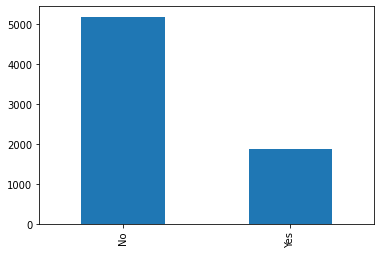

In [25]:
# Plot bar untuk membandingkan label pada target
eda.Churn.value_counts().plot(kind='bar')

- Target pada kedua label termasuk balance karena perbandingan antara kedua label masih berkisar 1 banding 2.5

# v. DATA PREPROCESSING, DATA CLEANING, SCALING

In [26]:
customer = df.copy()
customer.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [27]:
# Mengubah kolom total charges menjadi float
customer['TotalCharges'] = customer.TotalCharges.apply(pd.to_numeric, errors='coerce')

In [28]:
# Melihat apakah ada baris yang duplikat pada dataset
customer.duplicated().sum()

0

In [29]:
# Membuang Kolom customerID
customer.drop('customerID', axis=1, inplace=True)

In [30]:
# melihat missing value
customer.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Setelah tipe data pada kolom TotalCharges diubah menjadi float, Baru kelihatan ternyata terdapat missing value sebanyak 11 baris

## 1. Split Data

In [31]:
# Menentukan feature dan target untuk split data
X = customer.drop('Churn', axis=1)
y = customer['Churn']

In [32]:
print('Ukuran X : ', X.shape)
print('Ukuran y : ', y.shape)

Ukuran X :  (7043, 19)
Ukuran y :  (7043,)


In [33]:
# Split data train dan data test dengan perbandingan 75% : 25%
# Split data train dan data validation dengan perbandingan 85% : 15%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=48) # train-test
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=48) # train-val

## 2. Handle Missing Value

In [34]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

- Karena setelah diganti tipe data pada total charge, baru terlihat missing value di X_train ini


Skewness Value :  0.9473336668111625


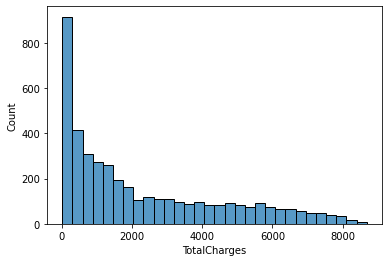

In [35]:
# Mebuat plot distribusi pada kolom yang memiliki missing value (TotalCharges)
sns.histplot(X_train['TotalCharges'], bins=30)
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

- Jika dilihat dari plot histogram diatas, didapatkan nilai skewnessnya itu sebesar 0.95. Dimana distribusinya berbentuk skewed positif, dan missing value pada feature ini bisa di isikan dengan median dari kolom itu sendiri

In [36]:
# Mengisi missing value pada setiap kolom TotalCharges dimana distribusinya skewed
# Jadi missing value diisikan dengan median dari kolom tersebut

X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
X_val['TotalCharges'] = X_val['TotalCharges'].fillna(X_train['TotalCharges'].median())


## 3. Handle Outlier

### Melihat bentuk distribusi dan outlier feature

In [37]:
# Membuat grafik histogram dan box plot pada feature numeric

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

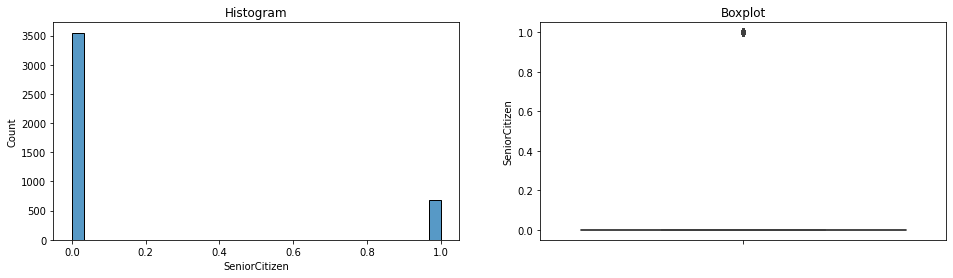


Skewness Value :  1.8555108932471704


In [38]:
diagnostic_plots(X_train, 'SeniorCitizen')
print('\nSkewness Value : ', X_train['SeniorCitizen'].skew())

- Pada feature SeniorCitizen, Menurut saya feature ini adalah termasuk categorical yang diisikan dengan numerik. Jadi terlihat outlier yang sebenarnya itu bukan outlier.

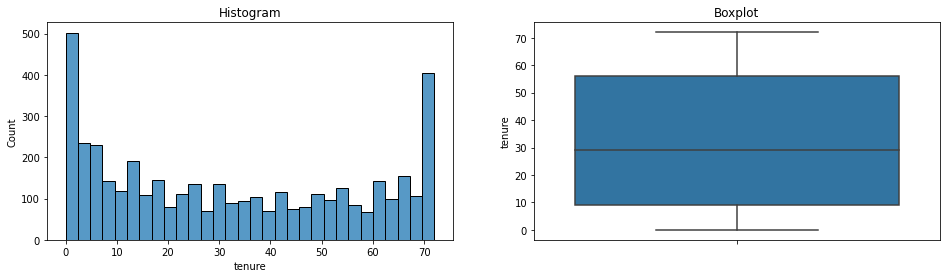


Skewness Value :  0.22917872028580968


In [39]:
diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

- Dari grafik histogram dan boxplot diatas, bisa dilihat feature tenure ini bentuk distribusinya normal dan tidak terdapat outlier didalamnya

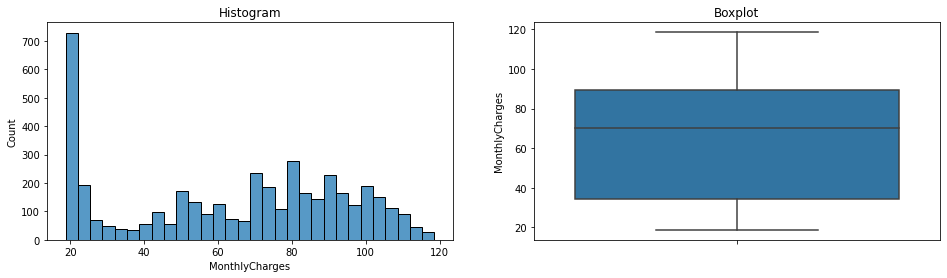


Skewness Value :  -0.2110730545312382


In [40]:
diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

- Dari grafik histogram dan boxplot diatas, bisa dilihat feature MonthlyCharges ini bentuk distribusinya normal dan tidak terdapat outlier didalamnya

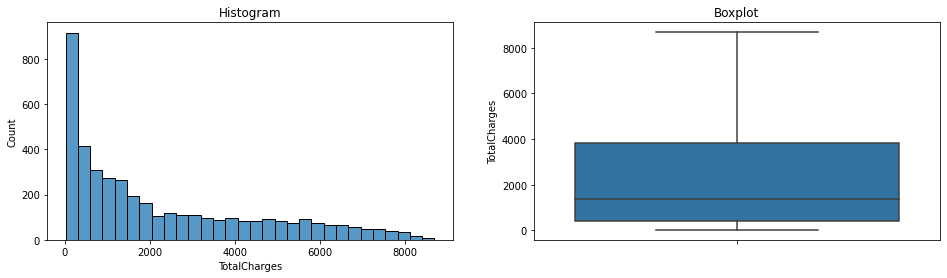


Skewness Value :  0.9483068839081443


In [41]:
diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

- Dari grafik histogram dan boxplot diatas, bisa dilihat feature TotalCharges ini bentuk distribusinya skewed positif dan tidak terdapat outlier didalamnya

### Handling Outlier Feature

#### Handling Outlier Feature SeniorCitizen (Skewed Positif Distibution)

- OUTLIER TIDAK SAYA HANDLING KARENA MENURUT SAYA KOLOM INI ADALAH KOLOM KATEGORI YANG BERISIKAN NUMERIC YANG ARTINYA KOLOM INI ISINYA BERUPA FREKUNSI

#### Handling Outlier Feature tenure (Normal Distibution)

- TIDAK ADA OUTLIER

#### Handling Outlier Feature MonthlyCharges (Normal Distibution)

- TIDAK ADA OUTLIER

#### Handling Outlier Feature TotalCharges (Skewed Positif Distibution)

- TIDAK ADA OUTLIER

## 4. Label Encoder

In [42]:
# Ordinal Encoder untuk kolom categories
ordinal_encoder = OrdinalEncoder()

In [43]:
# Ordinal Encoder X_train
X_train.gender = ordinal_encoder.fit_transform(X_train.gender.values.reshape(-1,1))
X_train.Partner = ordinal_encoder.fit_transform(X_train.Partner.values.reshape(-1,1))
X_train.Dependents = ordinal_encoder.fit_transform(X_train.Dependents.values.reshape(-1,1))
X_train.PhoneService = ordinal_encoder.fit_transform(X_train.PhoneService.values.reshape(-1,1))
X_train.MultipleLines = ordinal_encoder.fit_transform(X_train.MultipleLines.values.reshape(-1,1))
X_train.InternetService = ordinal_encoder.fit_transform(X_train.InternetService.values.reshape(-1,1))
X_train.OnlineSecurity = ordinal_encoder.fit_transform(X_train.OnlineSecurity.values.reshape(-1,1))
X_train.OnlineBackup = ordinal_encoder.fit_transform(X_train.OnlineBackup.values.reshape(-1,1))
X_train.DeviceProtection = ordinal_encoder.fit_transform(X_train.DeviceProtection.values.reshape(-1,1))
X_train.TechSupport = ordinal_encoder.fit_transform(X_train.TechSupport.values.reshape(-1,1))
X_train.StreamingTV = ordinal_encoder.fit_transform(X_train.StreamingTV.values.reshape(-1,1))
X_train.StreamingMovies = ordinal_encoder.fit_transform(X_train.StreamingMovies.values.reshape(-1,1))
X_train.Contract = ordinal_encoder.fit_transform(X_train.Contract.values.reshape(-1,1))
X_train.PaperlessBilling = ordinal_encoder.fit_transform(X_train.PaperlessBilling.values.reshape(-1,1))
X_train.PaymentMethod = ordinal_encoder.fit_transform(X_train.PaymentMethod.values.reshape(-1,1))

In [45]:
# Ordinal Encoder X_val
X_val.gender = ordinal_encoder.transform(X_val.gender.values.reshape(-1,1))
X_val.Partner = ordinal_encoder.transform(X_val.Partner.values.reshape(-1,1))
X_val.Dependents = ordinal_encoder.transform(X_val.Dependents.values.reshape(-1,1))
X_val.PhoneService = ordinal_encoder.transform(X_val.PhoneService.values.reshape(-1,1))
X_val.MultipleLines = ordinal_encoder.transform(X_val.MultipleLines.values.reshape(-1,1))
X_val.InternetService = ordinal_encoder.transform(X_val.InternetService.values.reshape(-1,1))
X_val.OnlineSecurity = ordinal_encoder.transform(X_val.OnlineSecurity.values.reshape(-1,1))
X_val.OnlineBackup = ordinal_encoder.transform(X_val.OnlineBackup.values.reshape(-1,1))
X_val.DeviceProtection = ordinal_encoder.transform(X_val.DeviceProtection.values.reshape(-1,1))
X_val.TechSupport = ordinal_encoder.transform(X_val.TechSupport.values.reshape(-1,1))
X_val.StreamingTV = ordinal_encoder.transform(X_val.StreamingTV.values.reshape(-1,1))
X_val.StreamingMovies = ordinal_encoder.transform(X_val.StreamingMovies.values.reshape(-1,1))
X_val.Contract = ordinal_encoder.transform(X_val.Contract.values.reshape(-1,1))
X_val.PaperlessBilling = ordinal_encoder.transform(X_val.PaperlessBilling.values.reshape(-1,1))
X_val.PaymentMethod = ordinal_encoder.transform(X_val.PaymentMethod.values.reshape(-1,1))

In [ ]:
# Label Encoder untuk encode label pada target
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

## 5. Feature Importance

In [ ]:
# Mencoba mengecek korelasi menggunakan feature importance pada random forrest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.02792689, 0.02011334, 0.0227168 , 0.01950138, 0.15653573,
       0.00568932, 0.02331815, 0.02745983, 0.05467544, 0.02995572,
       0.02160799, 0.04353416, 0.01731262, 0.01862246, 0.07526643,
       0.02504265, 0.04957138, 0.17586501, 0.1852847 ])

In [ ]:
# Melihat isi kolom pada X_train
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

<AxesSubplot:>

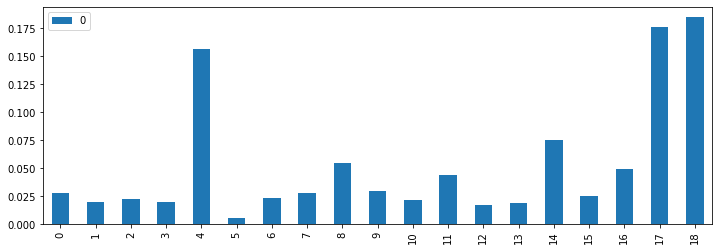

In [ ]:
# Bar chart feature importance
eda_train = rf.feature_importances_
pd.DataFrame(eda_train).plot(kind='bar', figsize=(12,4))

- Dari chart diatas nilai feature importancenya hampir semuanya tidak terlalu tinggi. Nilai tertinggi ada pada feature index 18 (Total Charges), dan kedua ada pada feature index 17 (Montly Charges) dan yang tiga ada pada feature ke 4 (tenure). Karena hampir semuanya tidak terlalu tinggi nilainya, saya putuskan untuk tidak ada feature yang dihapus.

## 6. Scaling

In [ ]:
# Metode scaling menggunakan MinMax Scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## 7. Pipeline Tensorflow

In [ ]:
# Mencoba menggunakan menggabungkan feature dan target pada train menggunakan tensor flow untuk training model
X_train_pp = tf.data.Dataset.from_tensor_slices((X_train, y_train))
for row in X_train_pp.take(3):
  print(row)

(<tf.Tensor: shape=(19,), dtype=float64, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.54166667,
       1.        , 0.        , 1.        , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 1.        ,
       0.        , 0.33333333, 0.02002002, 0.08581237])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(19,), dtype=float64, numpy=
array([0.        , 1.        , 1.        , 0.        , 0.36111111,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.5       ,
       0.        , 1.        , 0.42042042, 0.18216017])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(19,), dtype=float64, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.30555556,
       1.        , 0.        , 0.5       , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.70620621, 0.21

# vi. MODEL DEFINITION

In [ ]:
# Model Neural Network Sequential
model_sq = Sequential([
                     Dense(1, activation='sigmoid')  # Output Layer
])

In [ ]:
# Model Neural Network Functional API
data_in = Input(shape=(19,))
output_lay =  Dense(1, activation='sigmoid')(data_in)

model_ap = Model(inputs=data_in, outputs=output_lay)

# vii. MODEL TRAINING

## Model Training Sequential

In [ ]:
# Model Sequential Training - 01
model_sq1 = Sequential([
                     Dense(8, activation='relu', input_shape=(19,)),
                     Dense(1, activation='sigmoid')
])

# compile
model_sq1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history1 = model_sq1.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# - Pada model ini saya mencoba memasukan parameter yang simple terlebih dahulu untuk melihat bagaimana hasilnya
# - Dimodel ini saya hanya memasukan 1 hidden layer dengan jumlah neuron di hidden layer tersebut adalah 8 neuron yang dimana total feature X_trainnya 19
# - Dan saya menggunakan optimizer adam, loss menggunakan binary crossentropy dengan mentrain model sebanyak 200 kali atau epochsnya 200

Epoch 1/200
133/133 [==============================] - 1s 3ms/step - loss: 0.7736 - accuracy: 0.3962 - val_loss: 0.6737 - val_accuracy: 0.6471
Epoch 2/200
133/133 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7167 - val_loss: 0.5490 - val_accuracy: 0.7256
Epoch 3/200
133/133 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7363 - val_loss: 0.5011 - val_accuracy: 0.7285
Epoch 4/200
133/133 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7619 - val_loss: 0.4662 - val_accuracy: 0.7512
Epoch 5/200
133/133 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7806 - val_loss: 0.4479 - val_accuracy: 0.7739
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7867 - val_loss: 0.4398 - val_accuracy: 0.7796
Epoch 7/200
133/133 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7870 - val_loss: 0.4380 - val_accuracy: 0.7796

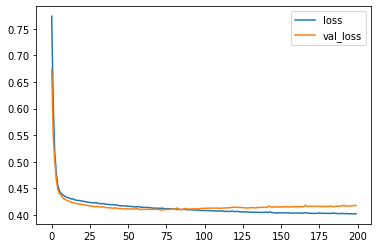

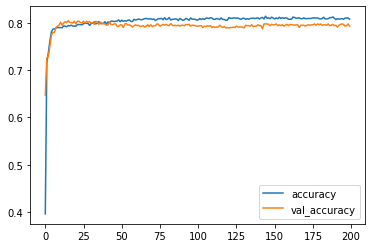

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics1 = pd.DataFrame(history1.history)
metrics1[['loss', 'val_loss']].plot();
metrics1[['accuracy', 'val_accuracy']].plot();

- Jika dilihat dari grafik loss diatas, model ini sudah cukup bagus karena bentuk garisnya antara train dan val sudah sangat berdekatan, dan ada saat dimana loss val dan training bersilangan dan garis loss val naik walapun tidak cukup jauh dari loss trainnya

- Dan untuk grafik akurasi, dari gambar grafik akurasi diatas, saya nilai akurasi validasi pergerakannya cukup stabil walaupun masih lebih tinggi garis akurasi traning. Tetapi arah grafik tersebut cukup mirip. Tetapi jika dilihat lebih dekat lagi, garis akurasi validasi pergerakannya dari naik setelah itu turun sedikit dan setelah itu cukup stagnan agak lurus. Sedangkan pada garis train pergerakan garisnya naik terus dimana disekitar epochs 50 keatas pergerakan garis training terbilang stagnan atau naik turun tetapi tipis.

In [ ]:
# Model Sequential Training - 02
initializer_sq = tf.keras.initializers.HeUniform()
model_sq2 = Sequential([
                     Dropout(rate=0.05),
                     Dense(8, activation='relu', input_shape=(19,), kernel_initializer=initializer_sq),
                     Dense(1, activation='sigmoid')
])

# compile
model_sq2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history2 = model_sq2.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# - Dan pada model percobaan kedua saya mulai memasukan sedikit parameter berbeda dari model sebelumnya, dimana saya masih tetap menggunakan 1 hidden layer
# dan saya memasukan parameter drop out pada hidden layer pertama, dan memasukan weight initializations yaitu HeUniform dimana ini adalah pasangan dari
# activation function relu, dan untuk yang tainingnya saya buat sama parameternyanya dengan menggunakan optimizer adam, loss menggunakan binary crossentropy
# dan mentrain model ini sebanyak 200 kali atau epochsnya 200

Epoch 1/200
133/133 [==============================] - 1s 3ms/step - loss: 0.7203 - accuracy: 0.5520 - val_loss: 0.5650 - val_accuracy: 0.7114
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7420 - val_loss: 0.5175 - val_accuracy: 0.7351
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7636 - val_loss: 0.4860 - val_accuracy: 0.7578
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7799 - val_loss: 0.4663 - val_accuracy: 0.7711
Epoch 5/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7813 - val_loss: 0.4541 - val_accuracy: 0.7833
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7863 - val_loss: 0.4451 - val_accuracy: 0.7843
Epoch 7/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7870 - val_loss: 0.4396 - val_accuracy: 0.7852

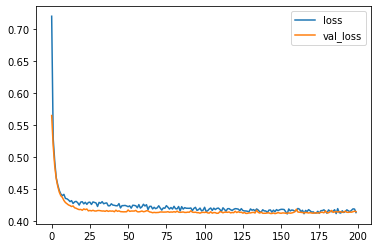

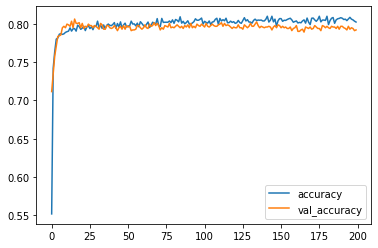

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics2 = pd.DataFrame(history2.history)
metrics2[['loss', 'val_loss']].plot();
metrics2[['accuracy', 'val_accuracy']].plot();

- Pada grafik loss diatas menurut saya hasilnya cukup baik dimana pergerakan loss pada kedua grafik cenderung menurun dan sangat berdekatan, jika dilihat lebih detail lagi kedua garis tidak ada indikasi mengarah naik lossnya. Jadi bentuk trend loss train dan val cenderung menurun

- Dan pada grafik akurasi, bisa dilihat bahwa pergerakan garis akurasi pada train dan val lebih tidak stabil dibandingkan dengan model 1, dimana bentuk spike pada kedua garis lebih terlihat, tetapi trend kedua garis tersebut sudah cukup baik.

In [ ]:
# Model Sequential Training - 03
initializer_sq = tf.keras.initializers.HeUniform()
model_sq3 = Sequential([
                     Dense(8, activation='relu', input_shape=(19,), kernel_initializer=initializer_sq),
                     Dense(1, activation='sigmoid')
])

# compile
model_sq3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history3 = model_sq3.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# - Pada percobaan model ketiga saya mencoba setting parameter yang sama persis seperti pada model kedua, dimana saya masukan 1 hidden layer
# activation functionnya pada hidden relu ditambah weigth menggunakan HeUniform dan pada output menggunakan sigmoid. Tetapi saya mencoba jika 
# saya hilangkan parameter dropoutnya, apakah ada perbendaan di hasilnya.

# - Dan untuk yang tainingnya saya buat sama parameternyanya dengan menggunakan optimizer adam, loss menggunakan binary crossentropy dan mentrain 
# model ini sebanyak 200 kali atau epochsnya 200

Epoch 1/200
133/133 [==============================] - 2s 5ms/step - loss: 0.5629 - accuracy: 0.7089 - val_loss: 0.5073 - val_accuracy: 0.7446
Epoch 2/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7550 - val_loss: 0.4710 - val_accuracy: 0.7663
Epoch 3/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7714 - val_loss: 0.4496 - val_accuracy: 0.7862
Epoch 4/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7849 - val_loss: 0.4392 - val_accuracy: 0.7928
Epoch 5/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.7896 - val_loss: 0.4323 - val_accuracy: 0.8004
Epoch 6/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7915 - val_loss: 0.4290 - val_accuracy: 0.7956
Epoch 7/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7960 - val_loss: 0.4255 - val_accuracy: 0.7994

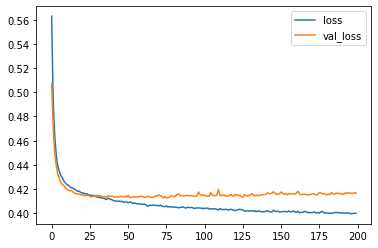

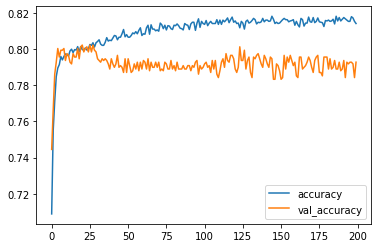

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics3 = pd.DataFrame(history3.history)
metrics3[['loss', 'val_loss']].plot();
metrics3[['accuracy', 'val_accuracy']].plot();

- Dari gambar grafik loss diatas, terdapat perubahan yang cukup signifikan ketika saya hapus parameter dropout pada model ini. Pergerakan garis validation untuk lossnya kurang baik karena yang saya harapkan untuk trend loss itu menurun sedangkan di grafik diatas untuk garis val malah naik lossnya menjauh dari garis trainnya. Jadi menurut saya model dengan parameter ini kurang baik

- Dan pada grafik akurasinya pergerakan pada garis validation malah cenderung menurun setelah naik selanjutnya malah menurun dan tidak stabil bentuknya. Dimana pada train trendnya naik sedangkan pada validation malah menurun menjauhi grafik train

## Model Training Functional API

In [ ]:
# Model Functional API Training - 01
initializer_ap = tf.keras.initializers.HeNormal()

data_in = Input(shape=(19,))
hidden_1 = Dense(12, activation='relu', kernel_initializer=initializer_ap)(data_in)
drop_1 = Dropout(rate=0.2)(hidden_1)
output_lay =  Dense(1, activation='sigmoid')(drop_1)

model_ap1 = Model(inputs=data_in, outputs=output_lay)

# - Dan untuk percobaan model ke 4, disini saya menggunakan penulisan dengan model fuctional API yang dimana pada percobaan model 1, 2, 3 saya menggunakan
# model penulisan sequential
# - Pada model percobaan ke saya mencoba melakukan beberapa perubahan pada parameternya dimana hidden layer masih 1 tetapi jumlah neuron saya naikan
# menjadi 12 yang dimana pada percobaan sebelumnya 8, dan penggunaan activation functionnya tetap saya pada hidden saya gunakan relu dan pada output
# saya gunakan sigmoid tetapi untuk weigth initialization pada hidden layer saya ubah dari HeUniform menjadi HeNormal. Saya ingin melihat apakah ada
# perbedaan yang signifikan jika saya mengganti weightnya

In [ ]:
# Melihat summary dari model 4
model_ap1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                240       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile dari data functional API
model_ap1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history4 = model_ap1.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# Dan untuk yang tainingnya saya buat sama parameternyanya dengan menggunakan optimizer adam, loss menggunakan binary crossentropy dan mentrain 
# model ini sebanyak 200 kali atau epochsnya 200

Epoch 1/200
133/133 [==============================] - 2s 6ms/step - loss: 0.5515 - accuracy: 0.7247 - val_loss: 0.5034 - val_accuracy: 0.7266
Epoch 2/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7373 - val_loss: 0.4775 - val_accuracy: 0.7313
Epoch 3/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7418 - val_loss: 0.4622 - val_accuracy: 0.7398
Epoch 4/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7546 - val_loss: 0.4500 - val_accuracy: 0.7597
Epoch 5/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7683 - val_loss: 0.4403 - val_accuracy: 0.7815
Epoch 6/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7742 - val_loss: 0.4352 - val_accuracy: 0.7833
Epoch 7/200
133/133 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7678 - val_loss: 0.4319 - val_accuracy: 0.7815

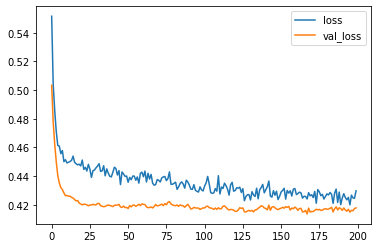

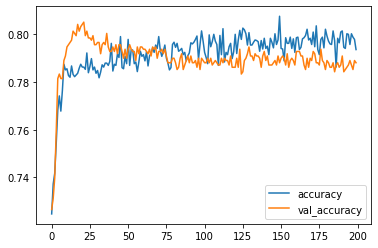

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics4 = pd.DataFrame(history4.history)
metrics4[['loss', 'val_loss']].plot();
metrics4[['accuracy', 'val_accuracy']].plot();

- Pada grafik loss bisa dilihat perbedaan yang cukup jauh antara validation dengan trainnya. Walaupun loss pada validation jauh lebih rendah dibandingkan trainnya, tetapi model ini masih kurang bagus karena jarak antara kedua garis cukup jauh. Model yang baik adalah bentuk trend garis antara model dan val nya bedekatan dengan trend menurun kebawah. Jadi model dengan parameter ini menurut say kurang baik.

- Dan juga trend garis train dan val pada akurasi juga kurang baik karena menurut saya kurang konsisten karena itu terjadinya spike yang tidak stabil antara kedua garis tersebut.

In [ ]:
# Model Functional API Training - 02
initializer_ap = tf.keras.initializers.HeNormal()

data_in = Input(shape=(19,))
hidden_1 = Dense(12, activation='relu', kernel_initializer=initializer_ap)(data_in)
drop_1 = Dropout(rate=0.3)(hidden_1)
hidden_2 = Dense(5, activation='relu', kernel_initializer=initializer_ap)(hidden_1)
output_lay =  Dense(1, activation='sigmoid')(hidden_2)

model_ap2 = Model(inputs=data_in, outputs=output_lay)

# - Untuk percobaan model ke 5 dengan penulisan model menggunakan functional API, saya hanya mencoba menaikan rate dropratenya yang dimana pada model 4
# rate dropoutnya pada layer hidden pertama sebesar 20% saya naikkan lagi menjadi 30% dan saya tambahkan hidden layer kedua dan sisanya parameternya 
# tetap, pada hidden layer activation functionnya relu dengan weight initializationnya HeNormal dan pada output activation functionnya menggunakan sigmoid

In [ ]:
# Melihat summary dari model 5
model_ap2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                240       
                                                                 
 dense_9 (Dense)             (None, 5)                 65        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile dari data functional API
model_ap2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history5 = model_ap2.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# Dan untuk yang tainingnya saya buat sama parameternyanya dengan menggunakan optimizer adam, loss menggunakan binary crossentropy dan mentrain 
# model ini sebanyak 200 kali atau epochsnya 200


Epoch 1/200
133/133 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.7458 - val_loss: 0.4810 - val_accuracy: 0.7606
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7735 - val_loss: 0.4528 - val_accuracy: 0.7805
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7872 - val_loss: 0.4425 - val_accuracy: 0.7824
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7832 - val_loss: 0.4382 - val_accuracy: 0.7843
Epoch 5/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7896 - val_loss: 0.4358 - val_accuracy: 0.7862
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7882 - val_loss: 0.4321 - val_accuracy: 0.7919
Epoch 7/200
133/133 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7941 - val_loss: 0.4329 - val_accuracy: 0.7871

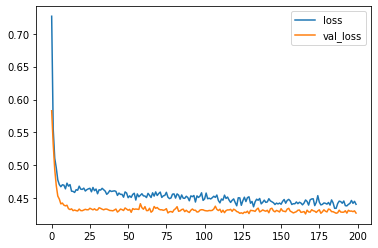

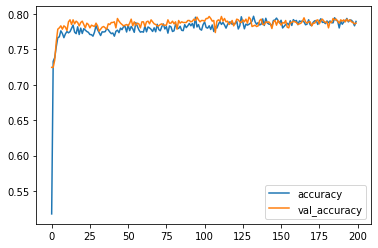

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics5 = pd.DataFrame(history5.history)
metrics5[['loss', 'val_loss']].plot();
metrics5[['accuracy', 'val_accuracy']].plot();

- Jika dilihat pada grafik loss diatas, model 5 ini perbandingan garis antara train dengan val lebih dekat daripada model 4. Tetapi gap diantara kedua garis tersebut masih cukup jauh dimana menurut saya model dengan tuning parameter ini masih kurang baik, karena saya maunya garis loss antara val dan train itu sangat berdekatan atau berhimpitan.

- Untuk akurasinya pada model ini jauh lebih baik daripada model 4 yang dimana pada model 4 terlalu jauh perbedaan antara garis train dan val dan juga trendnya menurun pada garis val. Sedangkan pada model ini trend garis valnya naik dan cukup stabil.

## Model Training Using Pipeline

In [ ]:
# Model Training Menggunakan Pipeline
def get_basic_model_pp():
  model_pp = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model_pp.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model_pp

In [ ]:
# model_test = get_basic_model_pp()
# model_test.fit(X_train_pp, y_train, epochs=100, validation_data=(X_val, y_val))

- Karena saya masih kurang mengerti untuk penggunaan pipeline untuk mentrain model jadi saya hanya mencoba menuliskan fungsinya saja. Karena ketika saya coba men train model ternyata error.

# viii. MODEL EVALUATION

- Dari training model diatas, didapatkan model terbaik yaitu model 2 dengan ditambahkannya 1 hidden layer dengan 8 neuron, ditambahkannya Layer weight initializers dengan HeUniform dan dimasukannya drop out sebesar 0.05 atau 5% setelah itu activation layernya menggunakan relu dan activation outputnya sigmoid. Setelah itu di optimaze dengan adam dan loss menggunakan binary crossentropy.

In [ ]:
# Model Sequential Evaluation
initializer_sq = tf.keras.initializers.HeUniform()
model_sq_eva = Sequential([
                     Dropout(rate=0.05),
                     Dense(8, activation='relu', input_shape=(19,), kernel_initializer=initializer_sq),
                     Dense(1, activation='sigmoid')
])

# compile
model_sq_eva.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history_eva = model_sq_eva.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

# Disini saya mencoba model terbaik, yaitu model 2 dengan parameter yang sudah saja jabarkan sebelumnya. Tetapi pada model sebelumnya model hanya 
# melakukan training sebanyak 200 kali atau epochsnya 200, pada model evaluasi ini saya mau mencoba mentrain sebanyak 500 kali atau dengan epochs 500
# untuk melihat apakah dengan train lebih jauh model tersebut masih baik atau tidak

Epoch 1/500
133/133 [==============================] - 1s 4ms/step - loss: 0.6608 - accuracy: 0.6102 - val_loss: 0.5051 - val_accuracy: 0.7493
Epoch 2/500
133/133 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7612 - val_loss: 0.4710 - val_accuracy: 0.7635
Epoch 3/500
133/133 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7801 - val_loss: 0.4516 - val_accuracy: 0.7711
Epoch 4/500
133/133 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.7789 - val_loss: 0.4412 - val_accuracy: 0.7767
Epoch 5/500
133/133 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7820 - val_loss: 0.4351 - val_accuracy: 0.7824
Epoch 6/500
133/133 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7827 - val_loss: 0.4308 - val_accuracy: 0.7852
Epoch 7/500
133/133 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7844 - val_loss: 0.4274 - val_accuracy: 0.7862

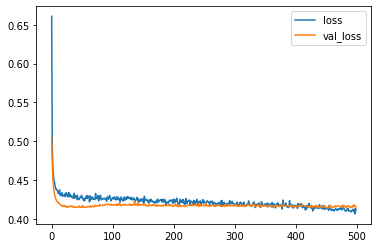

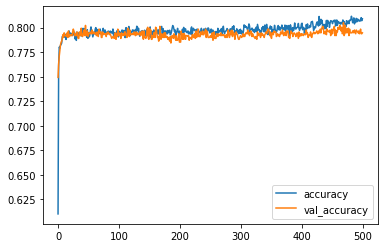

In [ ]:
# Membuat grafik perbandingan hasil loss dan akurasi pada train dan validation
metrics_eva = pd.DataFrame(history_eva.history)
metrics_eva[['loss', 'val_loss']].plot();
metrics_eva[['accuracy', 'val_accuracy']].plot();

- Jadi bisa dilihat dari hasil diatas, model terbaik atau model 2 jika kita training lebih banyak lagi atau lebih jauh. Model masih tetap stabil dimana tidak ada kenaikan loss yang signifikan di val dan train, kedua garis masih berdekatan dan berhimpitan pada epochs 300an. Jadi dari semua model percobaan diatas, model terbaik menurut saya model 2 ini. Karena saya lebih memfokuskan nilai loss dibandingkan nilai akurasi untuk penentuan model

- Dan pada grafik akurasi, menurut saya model ini sudah cukup baik karena perbedaan antara train dan model tidak signifikan dan cenderung stabil

In [ ]:
# Report Classification Model Terpilih
y_pred_eva = model_sq_eva.predict(X_val)
y_pred_eva[y_pred_eva <= 0.5] = 0
y_pred_eva[y_pred_eva > 0.5] = 1
y_pred_eva = y_pred_eva.squeeze()

print(classification_report(y_val, y_pred_eva))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       767
           1       0.65      0.55      0.59       290

    accuracy                           0.79      1057
   macro avg       0.74      0.72      0.73      1057
weighted avg       0.79      0.79      0.79      1057



- Jika dilihat dari hasil diatas, akurasi didapatkan di sekitar 0.79 dan untuk f1-scorenya memang kurang baik untuk memprediksi pelanggan yang churn atau pelangan yang churn tetapi dianggap tidak churn. Tetapi fokus saya disini adalah pada akurasi pada true positif dan false positif yang artinya pelanggan yang tidak churn dan pelanggan yang tidak churn tetapi dianggap churn dan dimodel ini nilai akurasinya pada recall 89 dan precision 84 yang dimana menurut saya sudah cukup baik.

# ix. MODEL INFERENCE

- Memprediksi dataset X_test dengan model neural network parameter terbaik yaitu model 2

In [46]:
# Memuat X_test
inference = X_test.copy()
inference.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2296,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.20,45.20
3324,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,75.55,75.55
3367,Male,0,No,No,52,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.25,4652.40


In [47]:
# Melihat missing value pada X_test
inference.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
dtype: int64

In [48]:
# Mengisi missing value pada kolom TotalCharges di X_test dengan median kolom tersebut
inference['TotalCharges'] = inference['TotalCharges'].fillna(inference['TotalCharges'].median())

In [50]:
# Mengganti label kolom kategori menggunakan label encoder pada X_test
inference.gender = ordinal_encoder.transform(inference.gender.values.reshape(-1,1))
inference.Partner = ordinal_encoder.transform(inference.Partner.values.reshape(-1,1))
inference.Dependents = ordinal_encoder.transform(inference.Dependents.values.reshape(-1,1))
inference.PhoneService = ordinal_encoder.transform(inference.PhoneService.values.reshape(-1,1))
inference.MultipleLines = ordinal_encoder.transform(inference.MultipleLines.values.reshape(-1,1))
inference.InternetService = ordinal_encoder.transform(inference.InternetService.values.reshape(-1,1))
inference.OnlineSecurity = ordinal_encoder.transform(inference.OnlineSecurity.values.reshape(-1,1))
inference.OnlineBackup = ordinal_encoder.transform(inference.OnlineBackup.values.reshape(-1,1))
inference.DeviceProtection = ordinal_encoder.transform(inference.DeviceProtection.values.reshape(-1,1))
inference.TechSupport = ordinal_encoder.transform(inference.TechSupport.values.reshape(-1,1))
inference.StreamingTV = ordinal_encoder.transform(inference.StreamingTV.values.reshape(-1,1))
inference.StreamingMovies = ordinal_encoder.transform(inference.StreamingMovies.values.reshape(-1,1))
inference.Contract = ordinal_encoder.transform(inference.Contract.values.reshape(-1,1))
inference.PaperlessBilling = ordinal_encoder.transform(inference.PaperlessBilling.values.reshape(-1,1))
inference.PaymentMethod = ordinal_encoder.transform(inference.PaymentMethod.values.reshape(-1,1))

In [ ]:
# Menscale X_test menggunakan MinMaxScaler
inference = scaler.transform(inference)

In [ ]:
# Memprediksi nilai target pada dataset X_test
result = model_sq_eva.predict(inference)
result[result <= 0.5] = 0
result[result > 0.5] = 1
result = result.squeeze()

pd.DataFrame(result)

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1756,1.0
1757,1.0
1758,0.0
1759,0.0


# x. Kesimpulan

Perusahaan Telco
- Karena ketika di EDA didapatkan pelanggan yang churn ini ada pada pelanggan yang menyewa jasa perbulan atau bulanan, untuk tim marketing masukkan saya untuk fokus memberikan promosi pada paket tahunan atau 2 tahunan seperti adanya dikson yang menggiurkan atau diberikan tambahan layanan yang menarik untuk paket tahunan dan 2tahunan, dll. Promosi ini untuk menarik customer lama atau baru untuk mengambil paket tahunan yang dimana untuk paket itu bisa membuat customer mendapatkan perasaan ketergantungan dengan product jasa perusahaan telco tsb, karena ketika customer mencoba paket bulanan dan ada service dari perusahaan kurang baik sedikit saja bisa jadi membuat customer kita itu ragu untuk menlanjutkan menggunakan jasanya.

Model Neural Network
- Pada model neural network ini ada banyak sekali parameter yang bisa ditunning, perbedaan tuning yang sedikit saya bisa membuat hasil model berbeda jauh dan ada juga penanganan-penanganan jika model terdapat masalah seperti vanishing gradient atau exploding gradient yang dimana di ubah parameter optimizationnya, menambahkan weight initializationnya pada layer, mencoba activation function terbaik ataupun menambahkan fungsi dropout pada layer yang dingginkan.

- Dari percobaan model diatas, dapat saya simpulkan bahwa jika featurenya tidak banyak pemberian hidden layer tidak baik jika terlalu banyak dan jumlah neuron pada hidden layer juga tidak baik jika terlalu tinggi mendekati featurenya ataupun terlalu rendah. Karena nanti akan mendapatkan hasil yang kurang baik dan garis grafik line antara train dan val cenderung menjauh atau pun garis trainnya stabil tetapi garis valnya menjauh atau naik pada lossnya. Untuk kasus ini fokus saya ada pada nilai loss yang rendah menurun dan stabil dan untuk akurasi selama trendnya tidak signifikan menurun jauh untuk saya sudah cukup baik.

- Pada kasus ini untuk weigth initialization terbaik adalah HeUniform dibandingkan HeNormal dimana pada semua model saya menggunakan activation funtionnya adalah relu jadi pasangan yang baik weigth initializationnya untuk activationnya relu adalah HeUniform dan HeNormal. Dan ketika diuji jika kita menggunakan weigth HeNormal loss dan akurasi model menjadi tidak stabil, menjadi banyak spike yang terjadi dan trend loss dan akurasi pada garis train dan validation cenderung menjadi menjauh.

- Dan untuk penggunaan dropout, menurut saya cukup baik digunakan. Karena ketika saya mencobanya, grafik loss dan akurasinya menjadi lebih baik dibandingkan jika tidak menggunakan dropout tersebut.

- Dan untuk training saya tidak mengubah atau menambahkan parameter macam-macam seperti batch. Karena menurut saya dataset ini tidak terlalu banyak jadi saya putuskan untuk tidak menggunakan batch, untuk optimizer saya menggunakan adam dan untuk loss saya menggunakan binary crossentropy disemua model.

- Dan untuk model terbaik saya dapatkan nilai akurasi di sekitar 0.79 dan untuk f1-scorenya memang kurang baik untuk memprediksi pelanggan yang churn atau pelangan yang churn tetapi dianggap tidak churn. Tetapi fokus saya disini adalah pada akurasi pada true positif dan false positif yang artinya pelanggan yang tidak churn dan pelanggan yang tidak churn tetapi dianggap churn karena saya ingin menjaga pelanggan jasa kita dan dimodel terbaik ini nilai akurasinya pada recall 89 dan precision 84 yang dimana menurut saya sudah cukup baik.